In [1]:
# Read dataset_summary.csv into a pandas DataFrame
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def read_csv_file(file_name: str) -> pd.DataFrame:
    csv_path = Path(__file__).with_name(file_name) if '__file__' in globals() else Path(file_name)
    print(f"Trying to read: {csv_path.resolve()}")
    df = pd.read_csv(csv_path)
    print('DataFrame shape:', df.shape)
    return df

In [64]:
df_all_data = read_csv_file('dataset_summary.csv')
df_all_data_successful_patches = read_csv_file('successfull_user_patches_mapping.csv')

Trying to read: /home/diogenes/pylingual_colaboration/pylingual_download/code/dataset_summary.csv
DataFrame shape: (294096, 9)
Trying to read: /home/diogenes/pylingual_colaboration/pylingual_download/code/successfull_user_patches_mapping.csv
DataFrame shape: (2065, 2)


In [65]:
df_all_data.head()

,file_hash,equivalence,error_type,syntactic_error_word,syntactic_error_message,precessed_error_message,syntactic_error_description,user_patches,semantic_error_lines
0,42c022a2ec74e489bd030de03d6136bef5ad4a6f248994...,True,NaN,NaN,NaN,NaN,NaN,False,[]
1,3cff2c6ae2e1cd68d7482fe7899f6b06560bdea1ba9884...,False,syntactic_error,IndentationError,unexpected indent,unexpected indent,Sorry: IndentationError: unexpected indent (in...,True,['***<module>: Failure detected at line number...
2,29bcf17560cf73d238cb88d698b3592ebe82e294ac4258...,True,NaN,NaN,NaN,NaN,NaN,False,[]
3,bb8012635e13ebabe986b66d605cbc49af8e487bda654b...,False,syntactic_error,SyntaxError,invalid syntax,invalid syntax,"File ""/decompiler_workspace/bb8012635e13ebabe9...",True,['***<module>.TestTypingError.test_unknown_fun...
4,2e09dff2125573b7e081a6c999f5891e7a9d1b6d0c01f5...,False,syntactic_error,SyntaxError,unterminated string literal (detected at line 78),unterminated string literal,"File ""/decompiler_workspace/2e09dff2125573b7e0...",False,[]


In [66]:
df_all_data_successful_patches.head()

,file_hash,successful_patches
0,1b071182ed192b46c3663a602507bca58c08890a1a6a0f...,090083fc164802921b7a3f2f831630a7688419d21500e1...
1,11b1becb1c340a39803513371a438fe2568976dbaa1364...,0c6c22354361d136b981a91f3b4fead472dd05781e5857...
2,f6a25baadda3fa3fdaae3edc080251abeb540e10b97524...,9f5ef2e81fbb379fea38d9caea6dc197a249449a5ffb75...
3,e25c38320dba6e5c7979d9818b3d82ccc7f0c0938f5b1b...,d847e3b74fb8cf82a1752ca272c4b57e4f3994afcbf5f8...
4,93c7ea3a0911ff7bfb80d6017b07715e000d634e2967d6...,6e22671bdd9cad2d1b3dbdf411ad48b47242a7421d53f7...


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column_counts(df: pd.DataFrame, column_name: str):
    """
    Plots the count of unique values in the specified column.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot counts for.
    
    Returns:
        None
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return
    
    # Count occurrences of each unique value in the column
    counts = df[column_name].value_counts(dropna=False)
    print(f"Raw counts for '{column_name}':")
    print(counts)

    # Prepare the data for plotting (excluding NaN values for display)
    display_counts = counts.to_dict()
    print(f"\nDisplay counts for '{column_name}':", display_counts)

    # Plotting the counts for the specified column
    plt.figure(figsize=(8, 6))  # Increase figure size to ensure space
    ax = sns.barplot(x=list(display_counts.keys()), y=list(display_counts.values()), palette='viridis')
    
    # Add the values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 10), textcoords='offset points')  # Adjust vertical position

    # Customizing the plot
    plt.title(f"Counts for '{column_name}'")
    plt.xlabel(column_name)
    plt.ylabel('Count')

    # Adjust layout to avoid clipping, giving more space at the top
    plt.subplots_adjust(top=0.85)  # Increase top margin
    plt.tight_layout()  # Apply tight layout

    # Show plot
    plt.show()

# Example usage:
# Assuming you have a DataFrame `df_all_data`
# plot_column_counts(df_all_data, 'equivalence')


Raw counts for 'equivalence':
equivalence
True     168856
False    125240
Name: count, dtype: int64

Display counts for 'equivalence': {True: 168856, False: 125240}


/tmp/ipykernel_21271/2752095695.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(display_counts.keys()), y=list(display_counts.values()), palette='viridis')


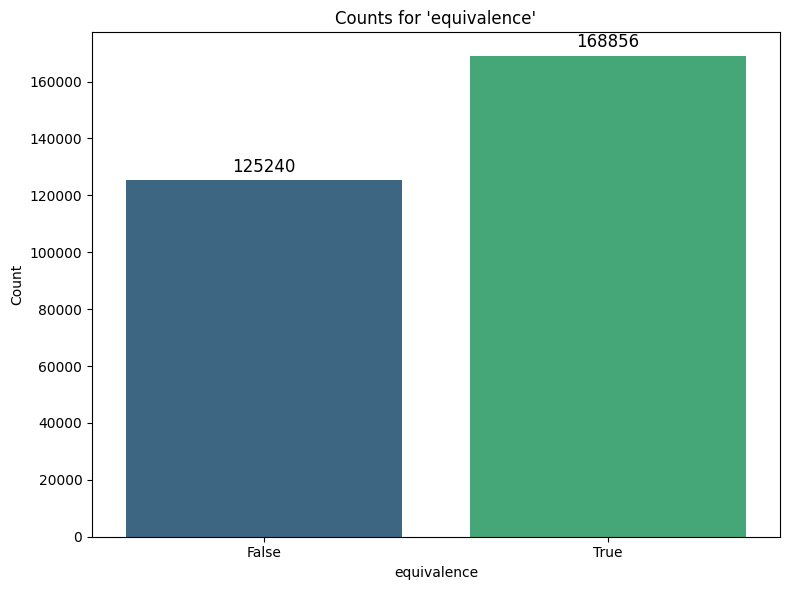

In [68]:
plot_column_counts(df_all_data, 'equivalence')

Raw counts for 'error_type':
error_type
NaN                168856
syntactic_error     80820
semantic_error      44420
Name: count, dtype: int64

Display counts for 'error_type': {nan: 168856, 'syntactic_error': 80820, 'semantic_error': 44420}


/tmp/ipykernel_21271/2752095695.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(display_counts.keys()), y=list(display_counts.values()), palette='viridis')


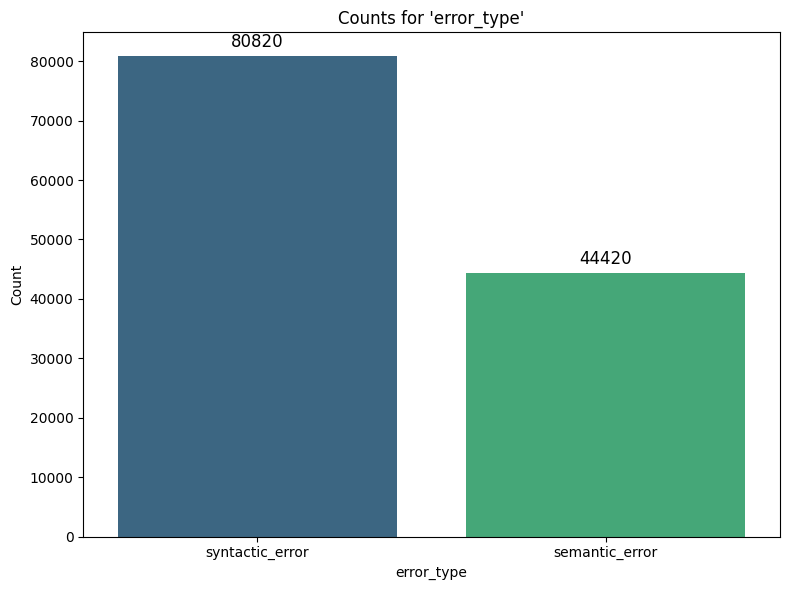

In [69]:
plot_column_counts(df_all_data, 'error_type')

Raw counts for 'syntactic_error_word':
syntactic_error_word
NaN                 213276
SyntaxError          67879
IndentationError     12937
PermissionError          4
Name: count, dtype: int64

Display counts for 'syntactic_error_word': {nan: 213276, 'SyntaxError': 67879, 'IndentationError': 12937, 'PermissionError': 4}


/tmp/ipykernel_21271/2752095695.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(display_counts.keys()), y=list(display_counts.values()), palette='viridis')


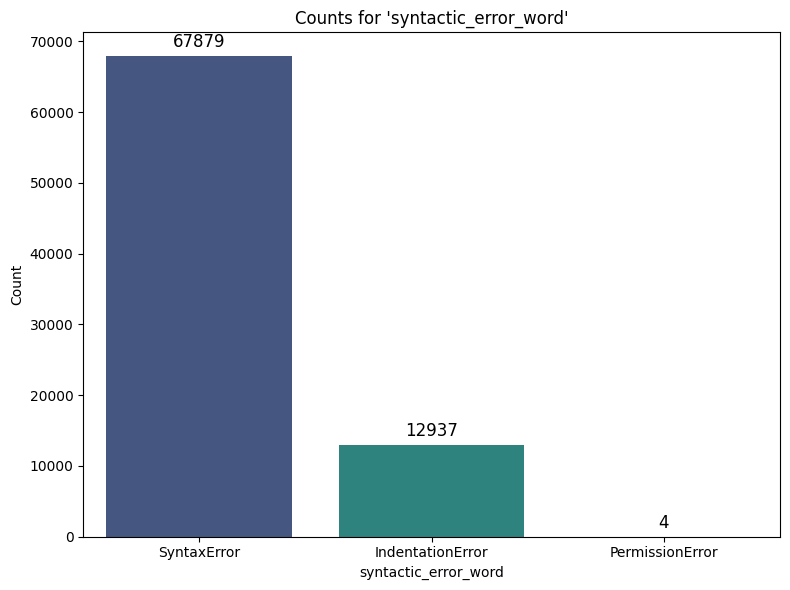

In [70]:
plot_column_counts(df_all_data, 'syntactic_error_word')

Raw counts for 'user_patches':
user_patches
False    286925
True       7171
Name: count, dtype: int64

Display counts for 'user_patches': {False: 286925, True: 7171}


/tmp/ipykernel_21271/2752095695.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(display_counts.keys()), y=list(display_counts.values()), palette='viridis')


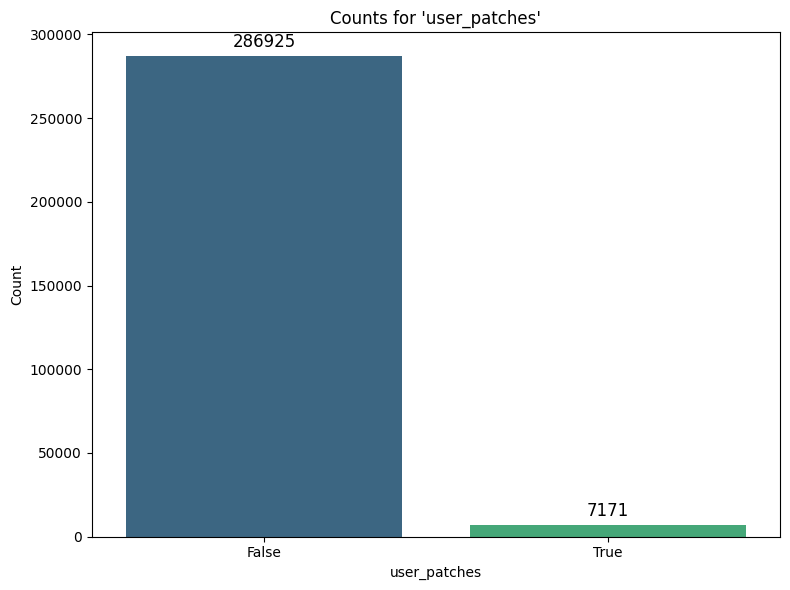

In [71]:
plot_column_counts(df_all_data, 'user_patches')

/tmp/ipykernel_21271/1517381413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=user_patches_count.index, y=user_patches_count.values, palette='viridis')


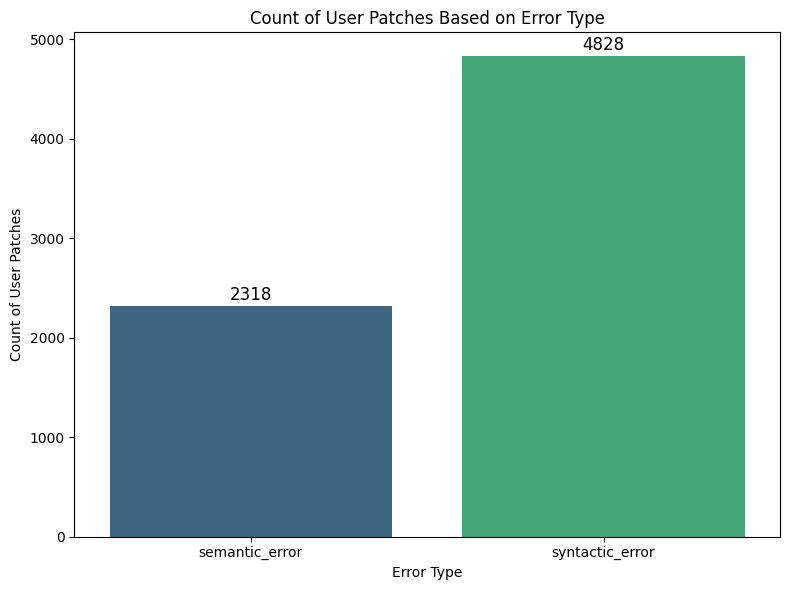

In [72]:

# Group by error_type and count the number of user patches (True)
user_patches_count = df_all_data.groupby('error_type')['user_patches'].sum()

# Plotting the count of user patches for each error type
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=user_patches_count.index, y=user_patches_count.values, palette='viridis')

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Customizing the plot
plt.title("Count of User Patches Based on Error Type")
plt.xlabel("Error Type")
plt.ylabel("Count of User Patches")
plt.tight_layout()

# Show plot
plt.show()


In [73]:
filtered_df = df_all_data[df_all_data['file_hash'].isin(df_all_data_successful_patches['file_hash'])]

/tmp/ipykernel_21271/1702086115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=user_patches_count.index, y=user_patches_count.values, palette='viridis')


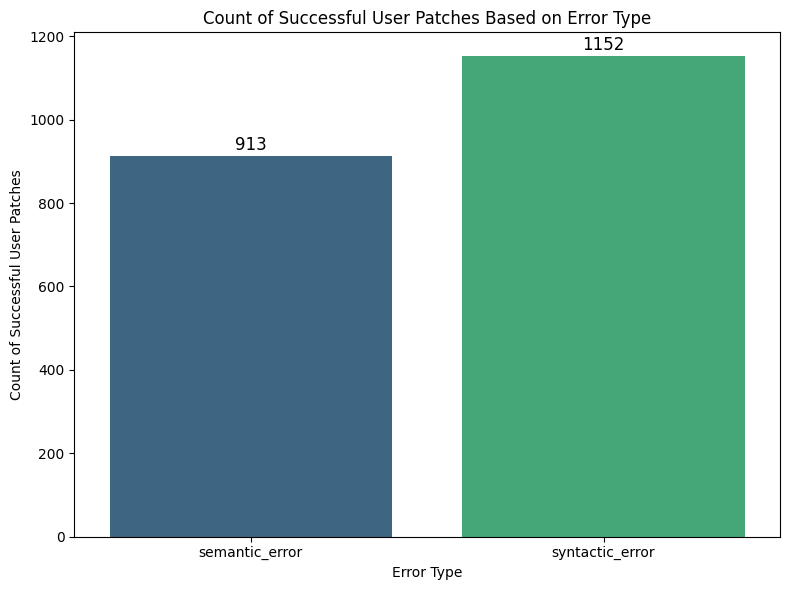

In [74]:


# Group by error_type and count the number of user patches (True)
user_patches_count = filtered_df.groupby('error_type')['user_patches'].sum()

# Plotting the count of user patches for each error type
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=user_patches_count.index, y=user_patches_count.values, palette='viridis')

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Customizing the plot
plt.title("Count of Successful User Patches Based on Error Type")
plt.xlabel("Error Type")
plt.ylabel("Count of Successful User Patches")
plt.tight_layout()

# Show plot
plt.show()


/tmp/ipykernel_21271/2643416647.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=values, palette='viridis')


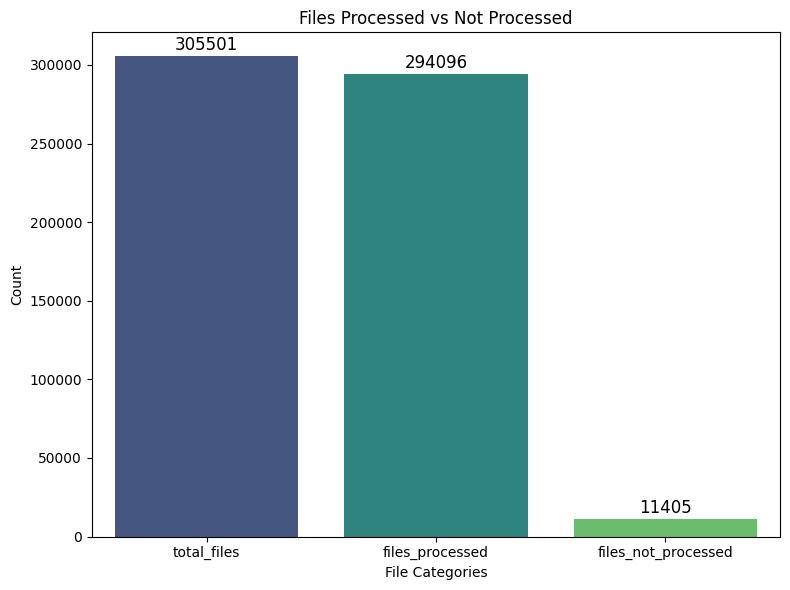

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data dictionary
data = {
    'total_files': 305501,
    'files_processed': 294096,
    'files_not_processed': 11405
}

# Prepare the data for plotting
labels = list(data.keys())
values = list(data.values())

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels, y=values, palette='viridis')

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Customizing the plot
plt.title("Files Processed vs Not Processed")
plt.xlabel("File Categories")
plt.ylabel("Count")
plt.tight_layout()

# Show plot
plt.show()


In [4]:
def summarize_dataframe(df):
    if df.empty:
        print("The dataframe is empty. No summaries to display.")
        return

    # Group by error type
    grouped = df.groupby("precessed_error_message").agg(
        total_data=("file_hash", "count"),
    )

    print("Summary by precessed_error_message:")
    print(grouped)

# Example usage
summarize_dataframe(df_all_data)

Summary by precessed_error_message:
                                           total_data
precessed_error_message                              
'(' was never closed                             1722
':' expected after dictionary key                 314
'[' was never closed                             1481
'async for' outside async function                  1
'async with' outside async function                 2
...                                               ...
unmatched ']'                                     201
unmatched '}'                                      94
unterminated f-string literal                      42
unterminated string literal                      5386
unterminated triple-quoted string literal           5

[419 rows x 1 columns]


In [3]:
df_all_data = read_csv_file('dataset_summary.csv')

Trying to read: /home/diogenes/pylingual_colaboration/pylingual_download/code/dataset_summary.csv
DataFrame shape: (294096, 9)


In [5]:
def balanced_topk_with_redistribution(
    df: pd.DataFrame,
    group_col: str = "precessed_error_message",
    k: int = 5,
    random_state: int | None = 42
) -> pd.DataFrame:
    """
    Returns a subset with up to k rows per group. If a group has < k rows,
    we fill the deficit by taking extra rows from other groups, prioritizing
    groups with the smallest surplus (size - k).
    """
    if df.empty:
        return df.copy()

    # include NaN groups as their own group
    sizes = df.groupby(group_col, dropna=False).size().rename("size")

    # initial take per group: min(size, k)
    take_initial = sizes.clip(upper=k)

    # sample an order for each group (stable across calls if random_state set)
    df = df.copy()
    df["_rand"] = 0 if random_state is None else pd.util.hash_pandas_object(
        df.index.to_series(), index=False
    ).astype("int64")  # deterministic-ish order if no random_state

    # A helper that returns the "first n" per group using the randomized order
    def take_first_n_per_group(n_per_group: pd.Series) -> pd.DataFrame:
        # sort within each group by index or a random-ish column to avoid bias
        ordered = df.sort_values(["_rand"])
        out_parts = []
        for grp, n in n_per_group.items():
            if n <= 0: 
                continue
            block = ordered[ordered[group_col].eq(grp) if pd.notna(grp) else ordered[group_col].isna()]
            out_parts.append(block.head(int(n)))
        return pd.concat(out_parts, axis=0) if out_parts else df.iloc[0:0]

    # 1) Initial sample: up to k per group
    initial_subset = take_first_n_per_group(take_initial)

    # 2) Compute total deficit across underfull groups
    deficit_per_group = (k - sizes).clip(lower=0)
    total_deficit = int(deficit_per_group.sum())

    if total_deficit == 0:
        result = initial_subset.drop(columns=["_rand"], errors="ignore")
        return result

    # 3) Compute available extra from big groups and prioritize smallest surplus
    surplus_per_group = (sizes - k).clip(lower=0)
    donors = surplus_per_group[surplus_per_group > 0].sort_values()  # smallest surplus first

    # 4) From donors, take extras (beyond the k already taken) until deficit is filled
    extras_parts = []
    remaining_deficit = total_deficit

    # For each donor, we can take up to its 'surplus' rows *from the remaining rows not used in initial_subset*
    used_idx = set(initial_subset.index)
    # Pre-split donor pools: remaining rows after initial take
    df_rem = df.loc[~df.index.isin(used_idx)].sort_values(["_rand"])

    for grp, avail in donors.items():
        if remaining_deficit <= 0:
            break
        pool = df_rem[df_rem[group_col].eq(grp) if pd.notna(grp) else df_rem[group_col].isna()]
        # we can take at most 'avail' from this group
        take_n = int(min(avail, remaining_deficit, len(pool)))
        if take_n > 0:
            extras_parts.append(pool.head(take_n))
            # drop used rows from df_rem to avoid reusing them
            df_rem = df_rem.drop(pool.head(take_n).index)
            remaining_deficit -= take_n

    # 5) Combine initial + extras
    if extras_parts:
        extras = pd.concat(extras_parts, axis=0)
        result = pd.concat([initial_subset, extras], axis=0)
    else:
        result = initial_subset

    # Clean up
    result = result.drop(columns=["_rand"], errors="ignore")

    return result


In [6]:
subset = balanced_topk_with_redistribution(df_all_data, group_col="precessed_error_message", k=5)

# sanity check: per-group counts in the subset
print(subset.groupby("precessed_error_message", dropna=False).size().sort_values())

# total size vs. ideal
num_groups = df_all_data.groupby("precessed_error_message", dropna=False).ngroups
print("subset rows:", len(subset), "ideal target:", num_groups * 5)


precessed_error_message
duplicate argument 'devtools' in function definition                                                                                                                                                                                                                    1
duplicate argument 'sssss2s22sss22s2ss2ss222s' in function definition                                                                                                                                                                                                   1
duplicate argument 'ssl_cert_reqs' in function definition                                                                                                                                                                                                               1
duplicate argument 'oooodododdodoooodo' in function definition                                                                                                                    

In [8]:
subset.to_csv("balanced_sample.csv", index=False)